In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

file_path = 'AmesHousing.csv'  
data = pd.read_csv(file_path)

lower_limit = data['Lot Area'].quantile(0.20)
upper_limit = data['Lot Area'].quantile(0.80)
pool_area = data['Pool Area'] < 1
bldg_type = data['Bldg Type'] == '1Fam'
full_bath = data['Full Bath'] < 3
filtered_data = data[(data['Lot Area'] >= lower_limit) & 
                     (data['Lot Area'] <= upper_limit) & 
                     pool_area & 
                     bldg_type & 
                     full_bath] 



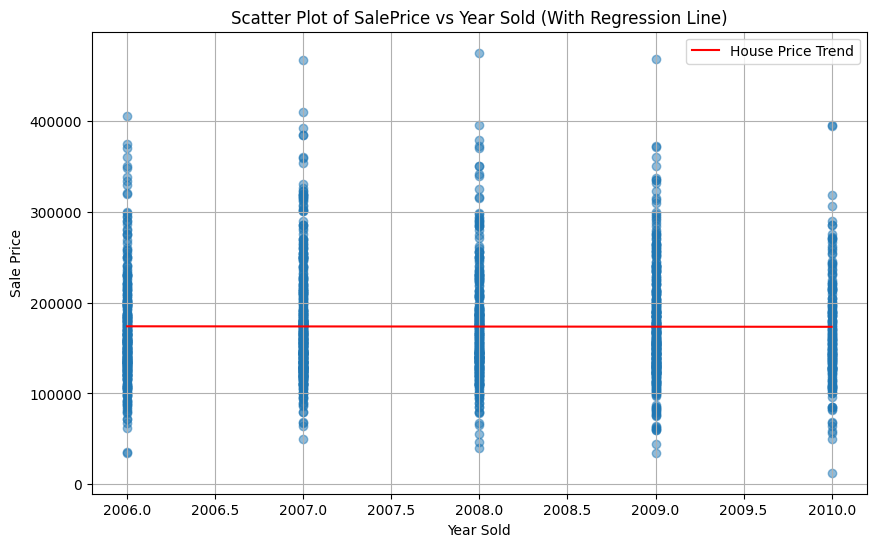

In [10]:

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Yr Sold'], filtered_data['SalePrice'], alpha=0.5)

x = filtered_data['Yr Sold']
y = filtered_data['SalePrice']
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, color='red', label='House Price Trend')

plt.title('Scatter Plot of SalePrice vs Year Sold (With Regression Line)')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.grid(True)
plt.legend()

plt.show()

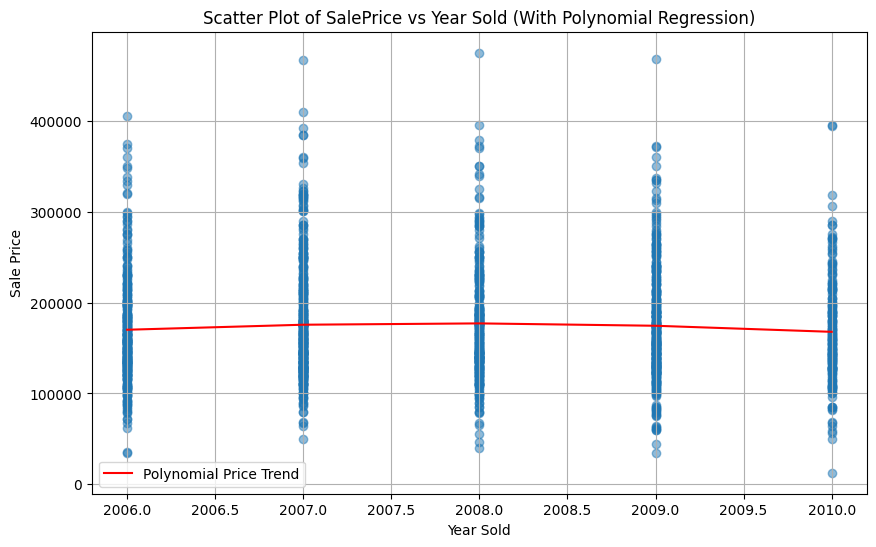

In [11]:


# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Yr Sold'], filtered_data['SalePrice'], alpha=0.5)

# Polynomial regression: degree 2 (quadratic)
x = filtered_data['Yr Sold'].values.reshape(-1, 1)  # Reshape for sklearn
y = filtered_data['SalePrice'].values

# Apply PolynomialFeatures
poly = PolynomialFeatures(degree=2)  # For quadratic regression
x_poly = poly.fit_transform(x)

# Fit the linear regression model
model = LinearRegression()
model.fit(x_poly, y)

# Predict using the polynomial model
y_poly_pred = model.predict(x_poly)

# Plot the polynomial regression line
sorted_idx = np.argsort(x.flatten())  # Sort the indices to plot the line smoothly
plt.plot(x[sorted_idx], y_poly_pred[sorted_idx], color='red', label='Polynomial Price Trend')

# Customize the plot
plt.title('Scatter Plot of SalePrice vs Year Sold (With Polynomial Regression)')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


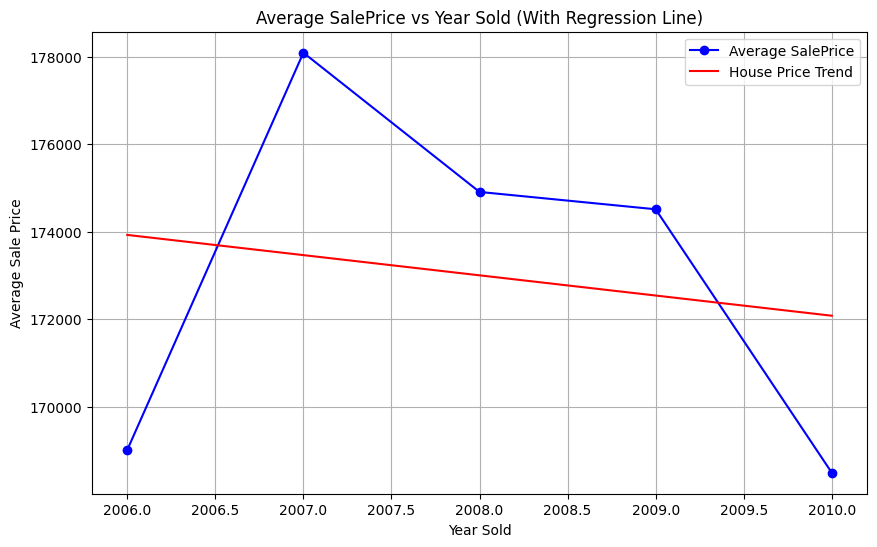

In [12]:


yearly_avg = filtered_data.groupby('Yr Sold')['SalePrice'].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', color='blue', label='Average SalePrice')

slope, intercept = np.polyfit(yearly_avg.index, yearly_avg.values, 1)
plt.plot(yearly_avg.index, slope * yearly_avg.index + intercept, color='red', label='House Price Trend')

plt.title('Average SalePrice vs Year Sold (With Regression Line)')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.legend()

plt.show()


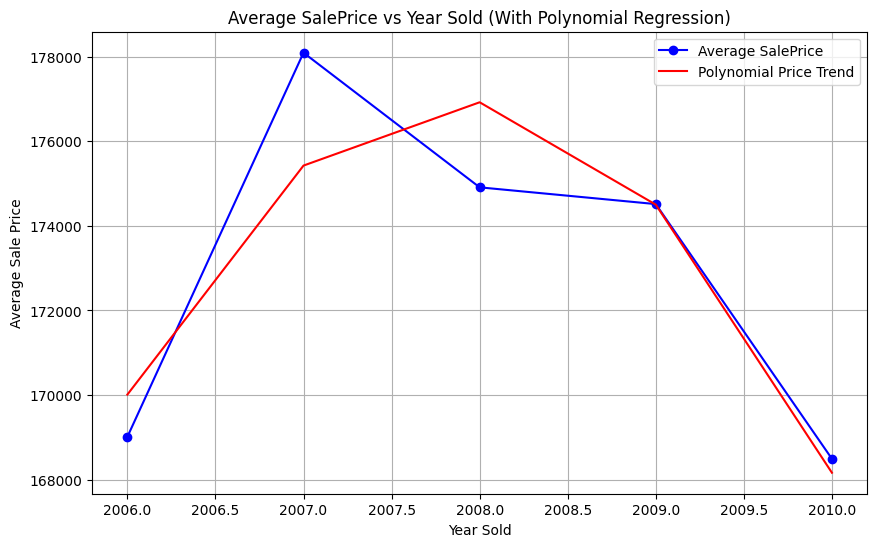

In [13]:


yearly_avg = filtered_data.groupby('Yr Sold')['SalePrice'].mean()

x = yearly_avg.index.values.reshape(-1, 1)
y = yearly_avg.values

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

y_poly_pred = model.predict(x_poly)

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', color='blue', label='Average SalePrice')
plt.plot(yearly_avg.index, y_poly_pred, color='red', label='Polynomial Price Trend')

plt.title('Average SalePrice vs Year Sold (With Polynomial Regression)')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.legend()

plt.show()

